<a href="https://colab.research.google.com/github/HARRSAVARTHINI/Weather-Analysis/blob/main/WeatherAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 78.6 MB/s eta 0:00:00


## IMPORTING REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
pd.set_option('display.max_columns', None)

## LOADING WEATHER DATASET

In [ ]:
df = pd.read_csv('all countries global temperature.csv')
df.head()

,ObjectId,Country Name,Unit,Change,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,"Afghanistan, Islamic Rep. of",Degree Celsius,Surface Temperature Change,0.898,0.652,-1.089,0.262,-0.470,-0.468,-0.295,0.532,0.105,0.394,0.690,0.583,-0.237,0.213,0.210,0.361,-0.048,0.490,0.988,-0.122,0.847,-0.058,-0.214,0.292,0.554,0.474,-0.016,0.592,0.795,1.301,1.109,1.366,1.384,0.615,1.427,0.491,1.780,0.736,0.804,0.929,1.646,1.446,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,2,Albania,Degree Celsius,Surface Temperature Change,-0.119,-0.200,-0.077,-0.299,-0.134,-0.203,-0.672,0.545,-0.822,0.225,-0.404,-0.313,0.237,-0.059,-0.212,-0.042,0.629,-0.049,0.430,-0.005,0.814,-0.263,0.105,0.117,1.370,-0.136,0.003,0.113,0.838,0.722,1.112,1.555,0.492,1.023,0.462,0.255,0.426,1.450,1.103,1.009,1.274,1.108,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,3,Algeria,Degree Celsius,Surface Temperature Change,0.114,-0.380,-0.342,-0.028,-0.502,-0.554,-0.817,0.519,0.029,0.661,0.214,0.200,0.388,0.576,0.007,0.513,0.299,0.990,1.346,0.386,1.270,0.034,-0.318,0.541,0.720,0.583,0.823,1.018,1.077,1.456,0.798,1.827,1.222,1.567,0.964,1.238,1.373,1.198,1.164,0.927,2.249,1.390,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
3,4,American Samoa,Degree Celsius,Surface Temperature Change,-0.036,-0.473,-0.070,0.322,-0.317,-0.128,-0.186,0.149,0.086,0.335,0.335,0.172,0.249,0.288,0.255,0.234,0.371,0.330,0.516,0.163,0.516,0.820,0.674,0.196,0.286,0.798,0.772,NaN,NaN,0.243,0.670,0.948,1.196,0.719,0.215,0.844,0.446,0.894,0.460,NaN,1.047,0.642,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815,0.653
4,5,"Andorra, Principality of",Degree Celsius,Surface Temperature Change,0.081,-0.355,-0.526,-0.010,-0.412,0.207,-0.081,-0.111,-0.174,0.046,-0.199,0.167,1.048,0.856,-0.159,0.058,0.392,0.353,0.856,1.152,1.724,0.215,0.368,0.175,1.502,1.245,0.535,1.736,0.980,1.020,1.015,1.476,0.828,1.946,0.919,0.835,1.463,0.974,0.891,1.358,0.411,1.617,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ObjectId      227 non-null    int64  
 1   Country Name  227 non-null    object 
 2   Unit          227 non-null    object 
 3   Change        227 non-null    object 
 4   1970          190 non-null    float64
 5   1971          193 non-null    float64
 6   1972          195 non-null    float64
 7   1973          195 non-null    float64
 8   1974          193 non-null    float64
 9   1975          190 non-null    float64
 10  1976          192 non-null    float64
 11  1977          191 non-null    float64
 12  1978          192 non-null    float64
 13  1979          191 non-null    float64
 14  1980          193 non-null    float64
 15  1981          192 non-null    float64
 16  1982          192 non-null    float64
 17  1983          189 non-null    float64
 18  1984          190 non-null    

In [ ]:
df.shape

(227, 56)

## DATA PREPROCESSING

In [ ]:
df.nunique()

ObjectId        227
Country Name    227
Unit              1
Change            1
1970            170
1971            176
1972            177
1973            182
1974            167
1975            172
1976            176
1977            166
1978            166
1979            177
1980            172
1981            173
1982            174
1983            174
1984            173
1985            168
1986            170
1987            178
1988            174
1989            180
1990            179
1991            167
1992            200
1993            191
1994            191
1995            196
1996            196
1997            197
1998            190
1999            193
2000            193
2001            187
2002            190
2003            195
2004            191
2005            194
2006            197
2007            197
2008            198
2009            191
2010            199
2011            196
2012            198
2013            195
2014            195
2015            199


In [ ]:
df.isna().sum()

ObjectId         0
Country Name     0
Unit             0
Change           0
1970            37
1971            34
1972            32
1973            32
1974            34
1975            37
1976            35
1977            36
1978            35
1979            36
1980            34
1981            35
1982            35
1983            38
1984            37
1985            37
1986            36
1987            36
1988            36
1989            35
1990            36
1991            37
1992            16
1993            18
1994            18
1995            16
1996            16
1997            19
1998            15
1999            17
2000            16
2001            18
2002            15
2003            12
2004            13
2005            14
2006            11
2007            10
2008            14
2009            13
2010            12
2011            10
2012            13
2013            11
2014            11
2015            11
2016            12
2017            13
2018        

In [ ]:
df = df.dropna()
df.isna().sum()

ObjectId        0
Country Name    0
Unit            0
Change          0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021      

In [ ]:
df.tail()

,ObjectId,Country Name,Unit,Change,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
221,222,West Bank and Gaza,Degree Celsius,Surface Temperature Change,0.216,-0.347,-0.488,-0.479,-0.268,-0.421,-0.585,0.000,-0.091,0.591,-0.218,-0.234,-0.579,-1.083,-0.218,-0.001,0.037,-0.312,0.022,-0.180,-0.110,0.403,-1.050,-0.359,0.811,-0.152,0.334,-0.125,0.894,0.908,0.312,0.930,0.806,0.643,0.621,0.258,0.645,0.582,0.788,0.898,2.391,0.648,1.110,1.194,0.940,1.408,1.705,0.821,2.093,1.298,1.553,1.887
222,223,Western Sahara,Degree Celsius,Surface Temperature Change,0.547,-0.620,-1.104,-0.013,-0.600,-0.267,-0.990,0.078,0.402,0.560,0.487,0.602,0.323,0.749,0.410,0.691,0.190,1.076,0.441,0.659,1.282,0.467,0.451,0.230,0.798,1.226,1.274,1.420,1.265,0.935,0.865,1.255,1.179,1.349,1.470,1.092,1.317,0.851,1.355,0.895,1.819,1.432,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.430,2.026,1.557
223,224,World,Degree Celsius,Surface Temperature Change,0.153,-0.089,-0.193,0.271,-0.179,0.091,-0.310,0.273,0.006,0.227,0.335,0.443,0.084,0.459,0.124,-0.030,0.242,0.400,0.560,0.335,0.645,0.470,0.187,0.352,0.510,0.839,0.367,0.660,0.996,0.787,0.732,0.833,1.018,0.890,0.908,1.090,0.982,1.181,0.920,0.944,1.205,0.907,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449,1.713,1.442
225,226,Zambia,Degree Celsius,Surface Temperature Change,0.354,-0.249,-0.146,0.386,-0.393,-0.116,-0.297,0.533,0.108,0.271,0.166,-0.112,0.398,1.093,0.608,0.240,0.101,1.011,0.701,0.216,0.875,0.290,0.854,0.189,0.546,0.865,0.912,0.674,1.215,0.418,0.311,0.501,0.956,1.159,0.801,1.339,0.610,1.075,0.446,0.577,1.481,0.965,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295,1.252,1.002
226,230,Zimbabwe,Degree Celsius,Surface Temperature Change,0.427,-0.033,-0.367,0.627,-0.471,-0.253,-0.430,0.444,-0.004,0.201,-0.003,-0.328,0.214,1.266,0.530,0.077,0.069,1.103,0.489,0.232,0.627,0.317,1.195,0.512,-0.043,0.678,-0.157,0.057,0.876,0.090,-0.340,0.030,0.438,0.377,0.042,1.065,-0.346,0.038,0.016,-0.336,0.918,0.220,0.329,0.102,-0.008,0.808,1.051,0.116,0.405,0.939,0.415,-0.101


In [ ]:
df= df.drop(['ObjectId'], axis=1)
df

,Country Name,Unit,Change,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Afghanistan, Islamic Rep. of",Degree Celsius,Surface Temperature Change,0.898,0.652,-1.089,0.262,-0.470,-0.468,-0.295,0.532,0.105,0.394,0.690,0.583,-0.237,0.213,0.210,0.361,-0.048,0.490,0.988,-0.122,0.847,-0.058,-0.214,0.292,0.554,0.474,-0.016,0.592,0.795,1.301,1.109,1.366,1.384,0.615,1.427,0.491,1.780,0.736,0.804,0.929,1.646,1.446,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,Albania,Degree Celsius,Surface Temperature Change,-0.119,-0.200,-0.077,-0.299,-0.134,-0.203,-0.672,0.545,-0.822,0.225,-0.404,-0.313,0.237,-0.059,-0.212,-0.042,0.629,-0.049,0.430,-0.005,0.814,-0.263,0.105,0.117,1.370,-0.136,0.003,0.113,0.838,0.722,1.112,1.555,0.492,1.023,0.462,0.255,0.426,1.450,1.103,1.009,1.274,1.108,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,Algeria,Degree Celsius,Surface Temperature Change,0.114,-0.380,-0.342,-0.028,-0.502,-0.554,-0.817,0.519,0.029,0.661,0.214,0.200,0.388,0.576,0.007,0.513,0.299,0.990,1.346,0.386,1.270,0.034,-0.318,0.541,0.720,0.583,0.823,1.018,1.077,1.456,0.798,1.827,1.222,1.567,0.964,1.238,1.373,1.198,1.164,0.927,2.249,1.390,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
4,"Andorra, Principality of",Degree Celsius,Surface Temperature Change,0.081,-0.355,-0.526,-0.010,-0.412,0.207,-0.081,-0.111,-0.174,0.046,-0.199,0.167,1.048,0.856,-0.159,0.058,0.392,0.353,0.856,1.152,1.724,0.215,0.368,0.175,1.502,1.245,0.535,1.736,0.980,1.020,1.015,1.476,0.828,1.946,0.919,0.835,1.463,0.974,0.891,1.358,0.411,1.617,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
5,Angola,Degree Celsius,Surface Temperature Change,0.249,-0.092,-0.029,0.477,-0.152,-0.018,-0.309,0.255,0.040,0.302,0.290,0.019,0.235,0.597,0.722,0.724,0.199,0.808,0.677,0.097,0.808,0.440,0.606,0.401,0.373,0.880,0.511,0.361,1.264,0.591,0.316,0.425,0.868,1.058,0.558,1.210,0.636,0.955,0.601,0.744,1.303,0.923,0.576,1.090,0.879,1.430,1.847,1.064,1.504,1.975,1.387,1.631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,West Bank and Gaza,Degree Celsius,Surface Temperature Change,0.216,-0.347,-0.488,-0.479,-0.268,-0.421,-0.585,0.000,-0.091,0.591,-0.218,-0.234,-0.579,-1.083,-0.218,-0.001,0.037,-0.312,0.022,-0.180,-0.110,0.403,-1.050,-0.359,0.811,-0.152,0.334,-0.125,0.894,0.908,0.312,0.930,0.806,0.643,0.621,0.258,0.645,0.582,0.788,0.898,2.391,0.648,1.110,1.194,0.940,1.408,1.705,0.821,2.093,1.298,1.553,1.887
222,Western Sahara,Degree Celsius,Surface Temperature Change,0.547,-0.620,-1.104,-0.013,-0.600,-0.267,-0.990,0.078,0.402,0.560,0.487,0.602,0.323,0.749,0.410,0.691,0.190,1.076,0.441,0.659,1.282,0.467,0.451,0.230,0.798,1.226,1.274,1.420,1.265,0.935,0.865,1.255,1.179,1.349,1.470,1.092,1.317,0.851,1.355,0.895,1.819,1.432,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.430,2.026,1.557
223,World,Degree Celsius,Surface Temperature Change,0.153,-0.089,-0.193,0.271,-0.179,0.091,-0.310,0.273,0.006,0.227,0.335,0.443,0.084,0.459,0.124,-0.030,0.242,0.400,0.560,0.335,0.645,0.470,0.187,0.352,0.510,0.839,0.367,0.660,0.996,0.787,0.732,0.833,1.018,0.890,0.908,1.090,0.982,1.181,0.920,0.944,1.205,0.907,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449,1.713,1.442
225,Zambia,Degree Celsius,Surface Temperature Change,0.354,-0.249,-0.146,0.386,-0.393,-0.116,-0.297,0.533,0.108,0.271,0.166,-0.112,0.398,1.093,0.608,0.240,0.101,1.011,0.701,0.216,0.875,0.290,0.854,0.189,0.546,0.865,0.912,0.674,1.215,0.418,0.311,0.501,0.956,1.159,0.801,1.339,0.610,1.075,0.446,0.577,1.481,0.965,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295,1.252,1.002


In [ ]:
df= df.rename(columns={'Country Name':'Countries'})
df

,Countries,Unit,Change,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Afghanistan, Islamic Rep. of",Degree Celsius,Surface Temperature Change,0.898,0.652,-1.089,0.262,-0.470,-0.468,-0.295,0.532,0.105,0.394,0.690,0.583,-0.237,0.213,0.210,0.361,-0.048,0.490,0.988,-0.122,0.847,-0.058,-0.214,0.292,0.554,0.474,-0.016,0.592,0.795,1.301,1.109,1.366,1.384,0.615,1.427,0.491,1.780,0.736,0.804,0.929,1.646,1.446,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,Albania,Degree Celsius,Surface Temperature Change,-0.119,-0.200,-0.077,-0.299,-0.134,-0.203,-0.672,0.545,-0.822,0.225,-0.404,-0.313,0.237,-0.059,-0.212,-0.042,0.629,-0.049,0.430,-0.005,0.814,-0.263,0.105,0.117,1.370,-0.136,0.003,0.113,0.838,0.722,1.112,1.555,0.492,1.023,0.462,0.255,0.426,1.450,1.103,1.009,1.274,1.108,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,Algeria,Degree Celsius,Surface Temperature Change,0.114,-0.380,-0.342,-0.028,-0.502,-0.554,-0.817,0.519,0.029,0.661,0.214,0.200,0.388,0.576,0.007,0.513,0.299,0.990,1.346,0.386,1.270,0.034,-0.318,0.541,0.720,0.583,0.823,1.018,1.077,1.456,0.798,1.827,1.222,1.567,0.964,1.238,1.373,1.198,1.164,0.927,2.249,1.390,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
4,"Andorra, Principality of",Degree Celsius,Surface Temperature Change,0.081,-0.355,-0.526,-0.010,-0.412,0.207,-0.081,-0.111,-0.174,0.046,-0.199,0.167,1.048,0.856,-0.159,0.058,0.392,0.353,0.856,1.152,1.724,0.215,0.368,0.175,1.502,1.245,0.535,1.736,0.980,1.020,1.015,1.476,0.828,1.946,0.919,0.835,1.463,0.974,0.891,1.358,0.411,1.617,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
5,Angola,Degree Celsius,Surface Temperature Change,0.249,-0.092,-0.029,0.477,-0.152,-0.018,-0.309,0.255,0.040,0.302,0.290,0.019,0.235,0.597,0.722,0.724,0.199,0.808,0.677,0.097,0.808,0.440,0.606,0.401,0.373,0.880,0.511,0.361,1.264,0.591,0.316,0.425,0.868,1.058,0.558,1.210,0.636,0.955,0.601,0.744,1.303,0.923,0.576,1.090,0.879,1.430,1.847,1.064,1.504,1.975,1.387,1.631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,West Bank and Gaza,Degree Celsius,Surface Temperature Change,0.216,-0.347,-0.488,-0.479,-0.268,-0.421,-0.585,0.000,-0.091,0.591,-0.218,-0.234,-0.579,-1.083,-0.218,-0.001,0.037,-0.312,0.022,-0.180,-0.110,0.403,-1.050,-0.359,0.811,-0.152,0.334,-0.125,0.894,0.908,0.312,0.930,0.806,0.643,0.621,0.258,0.645,0.582,0.788,0.898,2.391,0.648,1.110,1.194,0.940,1.408,1.705,0.821,2.093,1.298,1.553,1.887
222,Western Sahara,Degree Celsius,Surface Temperature Change,0.547,-0.620,-1.104,-0.013,-0.600,-0.267,-0.990,0.078,0.402,0.560,0.487,0.602,0.323,0.749,0.410,0.691,0.190,1.076,0.441,0.659,1.282,0.467,0.451,0.230,0.798,1.226,1.274,1.420,1.265,0.935,0.865,1.255,1.179,1.349,1.470,1.092,1.317,0.851,1.355,0.895,1.819,1.432,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.430,2.026,1.557
223,World,Degree Celsius,Surface Temperature Change,0.153,-0.089,-0.193,0.271,-0.179,0.091,-0.310,0.273,0.006,0.227,0.335,0.443,0.084,0.459,0.124,-0.030,0.242,0.400,0.560,0.335,0.645,0.470,0.187,0.352,0.510,0.839,0.367,0.660,0.996,0.787,0.732,0.833,1.018,0.890,0.908,1.090,0.982,1.181,0.920,0.944,1.205,0.907,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449,1.713,1.442
225,Zambia,Degree Celsius,Surface Temperature Change,0.354,-0.249,-0.146,0.386,-0.393,-0.116,-0.297,0.533,0.108,0.271,0.166,-0.112,0.398,1.093,0.608,0.240,0.101,1.011,0.701,0.216,0.875,0.290,0.854,0.189,0.546,0.865,0.912,0.674,1.215,0.418,0.311,0.501,0.956,1.159,0.801,1.339,0.610,1.075,0.446,0.577,1.481,0.965,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295,1.252,1.002


In [ ]:
years = [str(x) for x in range(1970,2022)]

df = df.melt(id_vars = ['Countries'],
             value_vars=years,
             var_name='Year',
             value_name='Total_Temperature'
            )
df

,Countries,Year,Total_Temperature
0,"Afghanistan, Islamic Rep. of",1970,0.898
1,Albania,1970,-0.119
2,Algeria,1970,0.114
3,"Andorra, Principality of",1970,0.081
4,Angola,1970,0.249
...,...,...,...
8315,West Bank and Gaza,2021,1.887
8316,Western Sahara,2021,1.557
8317,World,2021,1.442
8318,Zambia,2021,1.002


In [ ]:
total_df= df.groupby('Countries')['Total_Temperature'].sum()
total_df

Countries
Afghanistan, Islamic Rep. of    32.729
Albania                         29.551
Algeria                         41.587
Andorra, Principality of        42.721
Angola                          34.306
                                 ...  
West Bank and Gaza              20.447
Western Sahara                  42.463
World                           34.108
Zambia                          32.199
Zimbabwe                        14.120
Name: Total_Temperature, Length: 160, dtype: float64

In [ ]:
new_df = pd.DataFrame({'country': total_df.index, 'total': total_df.values})
new_df

,country,total
0,"Afghanistan, Islamic Rep. of",32.729
1,Albania,29.551
2,Algeria,41.587
3,"Andorra, Principality of",42.721
4,Angola,34.306
...,...,...
155,West Bank and Gaza,20.447
156,Western Sahara,42.463
157,World,34.108
158,Zambia,32.199


In [ ]:
top_10_countries = total_df.sort_values(ascending=False).head(10)
top_10_countries

Countries
Mongolia                       53.639
Gambia, The                    51.255
Mauritania, Islamic Rep. of    49.907
Senegal                        48.625
Finland                        48.567
Austria                        48.190
Guinea-Bissau                  47.402
Liechtenstein                  46.317
Sweden                         46.253
Morocco                        46.252
Name: Total_Temperature, dtype: float64

In [ ]:
df_top_countries = pd.DataFrame({'Country': top_10_countries.index, 'Total': top_10_countries.values})
df_top_countries

,Country,Total
0,Mongolia,53.639
1,"Gambia, The",51.255
2,"Mauritania, Islamic Rep. of",49.907
3,Senegal,48.625
4,Finland,48.567
5,Austria,48.190
6,Guinea-Bissau,47.402
7,Liechtenstein,46.317
8,Sweden,46.253
9,Morocco,46.252


In [ ]:
df_bottom_countries = total_df.sort_values(ascending=True).head(10)
df_bottom_countries

Countries
Chile                        13.456
Bangladesh                   13.971
Zimbabwe                     14.120
Saint Pierre and Miquelon    14.495
Nepal                        15.206
India                        17.298
Argentina                    18.449
Tonga                        18.489
New Zealand                  18.490
Mauritius                    18.594
Name: Total_Temperature, dtype: float64

In [ ]:
df_bottom_countries = pd.DataFrame({'Country': top_10_countries.index, 'Total': df_bottom_countries.values})
df_bottom_countries

,Country,Total
0,Mongolia,13.456
1,"Gambia, The",13.971
2,"Mauritania, Islamic Rep. of",14.120
3,Senegal,14.495
4,Finland,15.206
5,Austria,17.298
6,Guinea-Bissau,18.449
7,Liechtenstein,18.489
8,Sweden,18.490
9,Morocco,18.594


## Data Visualization

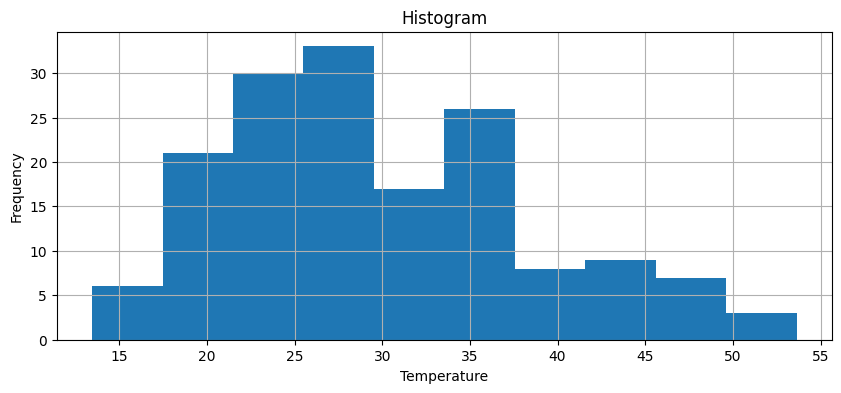

In [ ]:

plt.figure(figsize = (10, 4))
x = new_df.total
plt.title("Histogram")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.grid()
plt.hist(x)
plt.show()

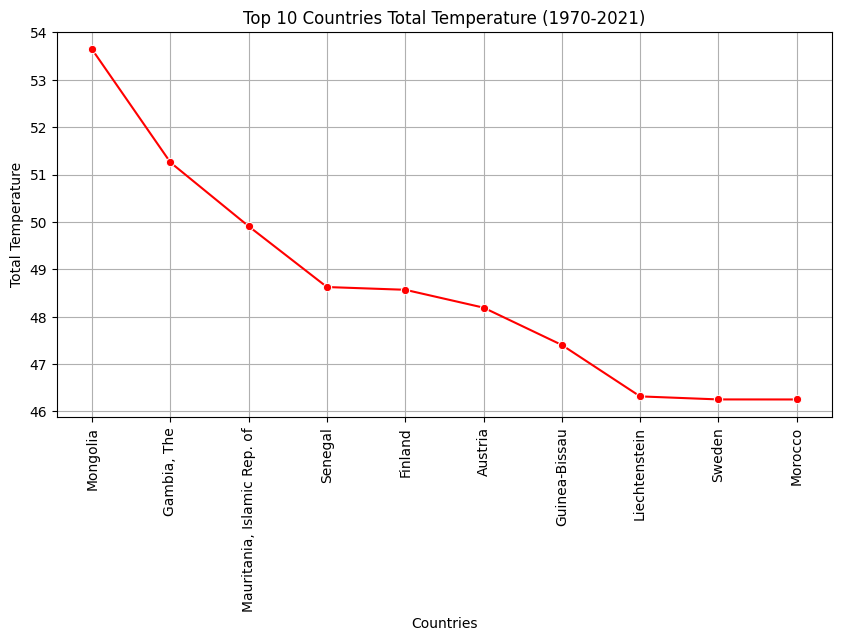

In [ ]:
plt.figure(figsize=(10,5))
x=sns.lineplot(data=df_top_countries, x='Country', y='Total', color='red', marker='o')
plt.xticks(rotation=90)
x.yaxis.grid()
x.xaxis.grid()
plt.title('Top 10 Countries Total Temperature (1970-2021)')
plt.xlabel('Countries')
plt.ylabel('Total Temperature')
plt.show()

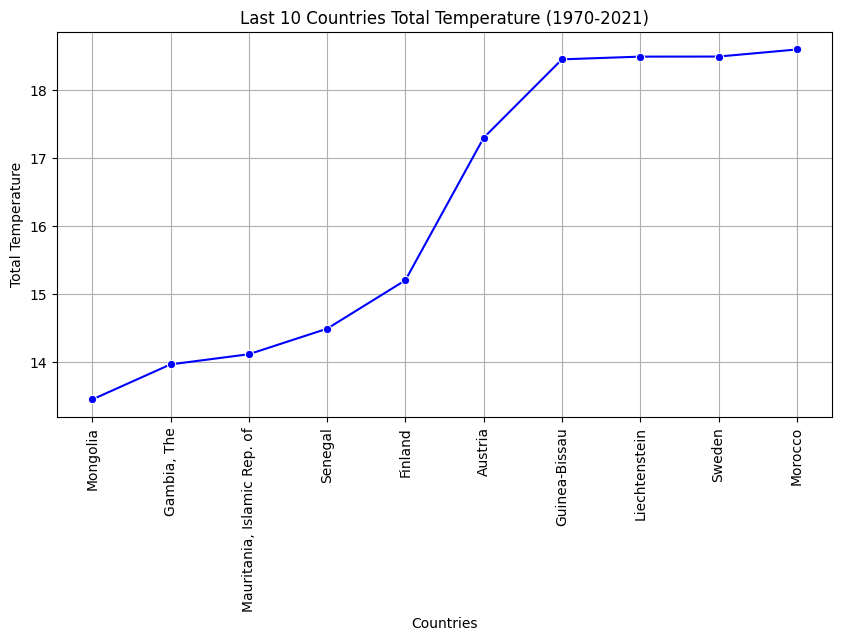

In [ ]:
plt.figure(figsize=(10,5))
x=sns.lineplot(data=df_bottom_countries, x='Country', y='Total', color='blue', marker='o')
plt.xticks(rotation=90)
x.yaxis.grid()
x.xaxis.grid()
plt.title('Last 10 Countries Total Temperature (1970-2021)')
plt.xlabel('Countries')
plt.ylabel('Total Temperature')
plt.show()

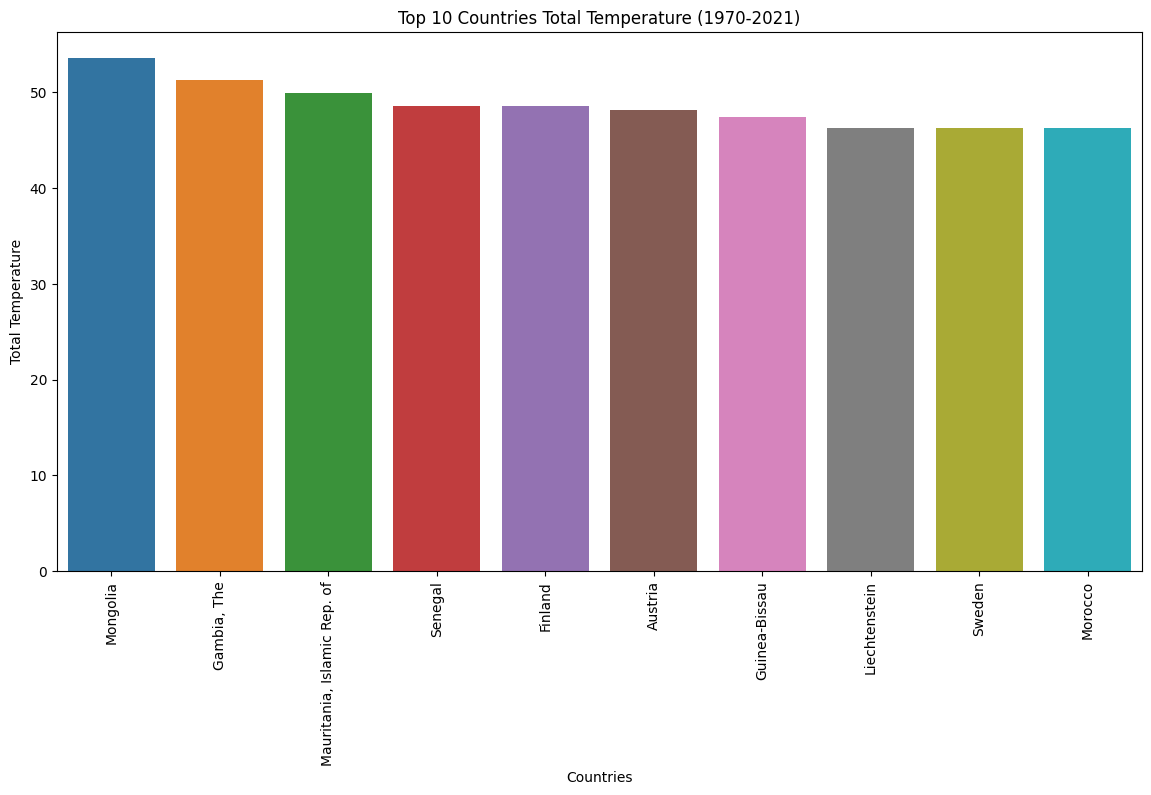

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(data=df_top_countries, x='Country', y='Total')
plt.xticks(rotation=90)
plt.title('Top 10 Countries Total Temperature (1970-2021)')
plt.xlabel('Countries')
plt.ylabel('Total Temperature')
plt.show()

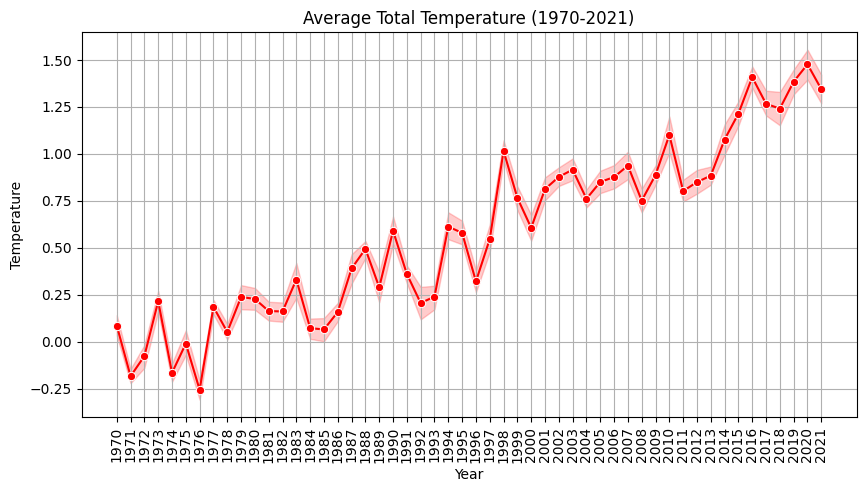

In [ ]:
plt.figure(figsize=(10,5))
x=sns.lineplot(data=df, x='Year', y='Total_Temperature', color='red', marker='o')
plt.xticks(rotation=90)
x.yaxis.grid()
x.xaxis.grid()
plt.title('Average Total Temperature (1970-2021)')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

<Figure size 1000x500 with 0 Axes>

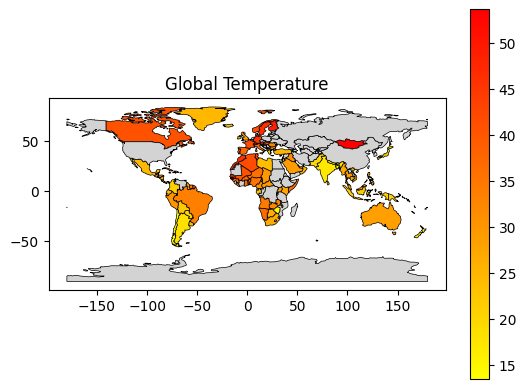

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map = world.merge(new_df, left_on='name', right_on='country', how='left')
x = world_map.plot(column='total',
            cmap='autumn_r',
            edgecolor='Black',
            linewidth=0.5,
            missing_kwds={"color": "lightgray"},
            legend=True)
x.set_title('Global Temperature')

plt.show()